<h1 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:45px; 
           padding:20px;
           border-radius:12px;">
     <b> 🌧️ Rainfall & Climate Machine Learning Modeling</b>
</h1>


## <b>Project Overview</b> 

This notebook demonstrates the **professional, industry-based application of Machine Learning models**
on a cleaned version of the **IAC dataset**.

The objective of this project is to:
- Apply **Supervised and Unsupervised Machine Learning models**
- Follow **real-world ML workflow standards**
- Provide **clear explanations before each model**
- Build a notebook suitable for **portfolio, Kaggle, and LinkedIn**



<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Importing Libraries</b>
</h2>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Load Dataset</b>
</h2>

> The dataset used here is already cleaned and preprocessed.


In [2]:
df = pd.read_csv("4) cleaned_weather_data.csv")
df.head()

,Date,Location,Year,Uv_Index,Solar_Radiation_Dni,Temperature_Avg,Dew_Point_Temp,Temperature_Range,Temperature_Max,Temperature_Min,...,Surface_Pressure,Wind_Speed_Max_2m,Wind_Speed_Min_2m,Wind_Speed_Range_2m,Wind_Direction_Deg,Wind_Speed_Min_10m,Wet_Bulb_Temperature,Month,Day,Month_Num
0,1990-01-01,Gharo,1990,0.98,23.44,18.73,4.88,14.20,26.01,11.81,...,101.49,2.85,1.75,1.10,340.6,2.08,11.81,January,Monday,1
1,1990-01-02,Gharo,1990,0.98,23.44,20.27,13.82,9.82,26.12,16.30,...,101.40,4.45,0.84,3.61,264.8,0.97,17.04,January,Tuesday,1
2,1990-01-03,Gharo,1990,0.98,23.44,20.79,15.31,8.84,26.23,17.39,...,101.44,4.07,1.18,2.89,263.3,1.73,18.05,January,Wednesday,1
3,1990-01-04,Gharo,1990,0.98,23.44,20.75,11.12,12.41,27.60,15.19,...,101.65,3.46,0.86,2.60,9.9,1.28,15.94,January,Thursday,1
4,1990-01-05,Gharo,1990,0.98,23.44,19.84,7.14,13.23,27.31,14.08,...,101.76,5.16,1.24,3.92,46.1,2.32,13.49,January,Friday,1


<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>Data Understanding through graphs</b>
</h2>

> this is imp before what model we have to apply



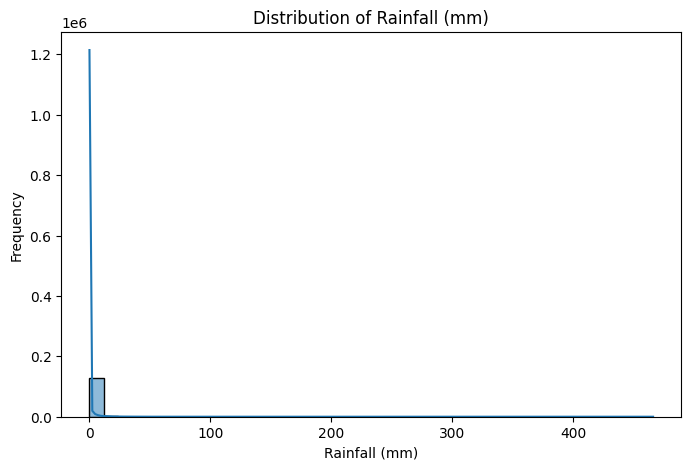

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rainfall_Mm"], bins=40, kde=True)
plt.title("Distribution of Rainfall (mm)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

> Why this graph?

Detect skewness

Decide regression vs transformation

Spot extreme rainfall values

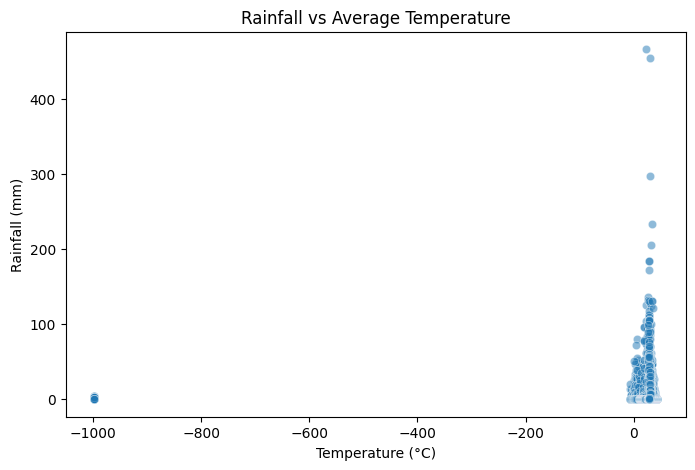

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df["Temperature_Avg"],
    y=df["Rainfall_Mm"],
    alpha=0.5
)
plt.title("Rainfall vs Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()


> ✔ Non-linear pattern

Solution: Tree-based models (Random Forest, XGBoost)


<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Data Scaling</b>
</h2>


In [7]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract useful time-based features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Drop original Date column
df.drop(columns=["Date"], inplace=True)


In [8]:
# Convert categorical column to numeric
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Data Preparation</b>
</h2>


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Define target variable
target_col = "Rainfall_Mm"

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   # Fit only on training data
X_test = scaler.transform(X_test)         # Apply same scaling to test data


<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Supervised Learning Models</b>
</h2>


<h2 style="text-align:center; 
           background:#a5eaf1; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>Linear Regression</b>
</h2>

> Used for predicting **continuous numerical values**.


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

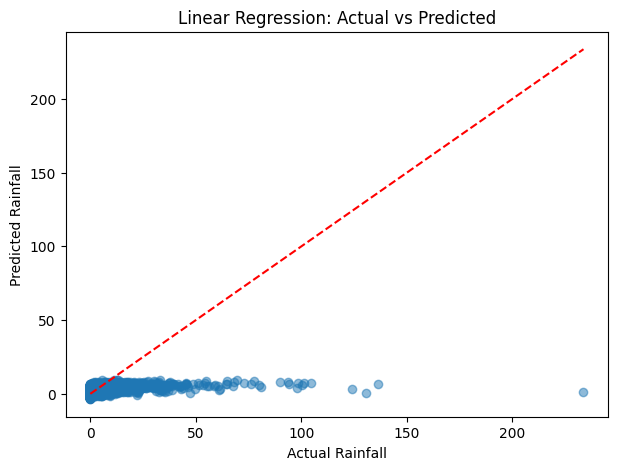

R2: 0.1379963927870691


In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

# Plot prediction vs actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

print("R2:", r2_score(y_test, y_pred_lr))


<h2 style="text-align:center; 
           background:#a5eaf1; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>RandomForest</b>
</h2>

> Used for predicting **High-accuracy rainfall predictions**.


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(
    n_estimators=50,        # no of trees
    max_depth=12,           # limit tree depth
    n_jobs=-1,              # use all CPU cores
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)


In [21]:
pred_df = pd.DataFrame({
    "Actual_Rainfall": y_test.values[:10],
    "Predicted_Rainfall": y_pred_rf[:10]
})

pred_df

,Actual_Rainfall,Predicted_Rainfall
0,0.00,0.038454
1,2.77,3.493941
2,0.00,0.028759
3,0.00,0.017072
4,0.00,0.177037
5,0.00,0.219831
6,4.17,1.318226
7,0.00,0.112825
8,0.00,0.031263
9,0.00,0.031955


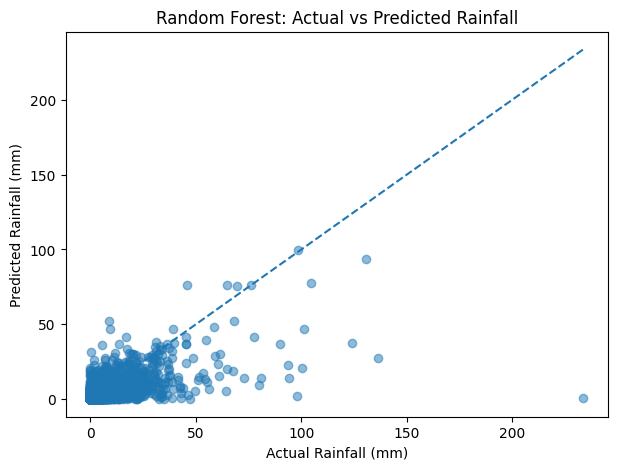

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.title("Random Forest: Actual vs Predicted Rainfall")
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.show()


In [23]:
print("R² Score:", r2_score(y_test, y_pred_rf))


R² Score: 0.46056360932583984


<h2 style="text-align:center; 
           background:#a5eaf1; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>XGBoost</b>
</h2>

> Used for predicting **Complex rainfall patterns**.


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

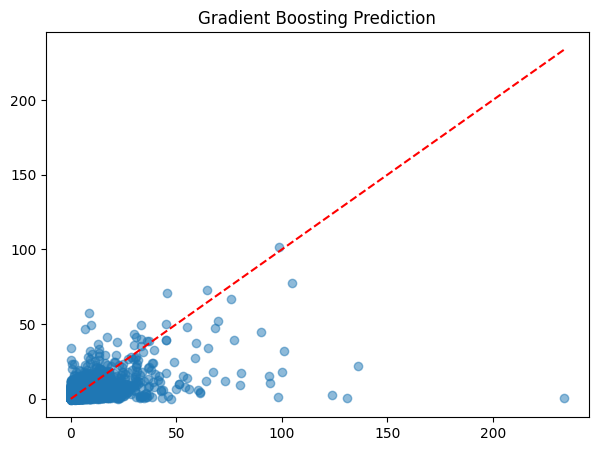

R2: 0.3578503094183648


In [25]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("Gradient Boosting Prediction")
plt.show()

print("R2:", r2_score(y_test, y_pred_gbr))


<h2 style="text-align:center; 
           background:#a5eaf1; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>Logistic Regression</b>
</h2>

> Used for **binary classification problems**.


In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


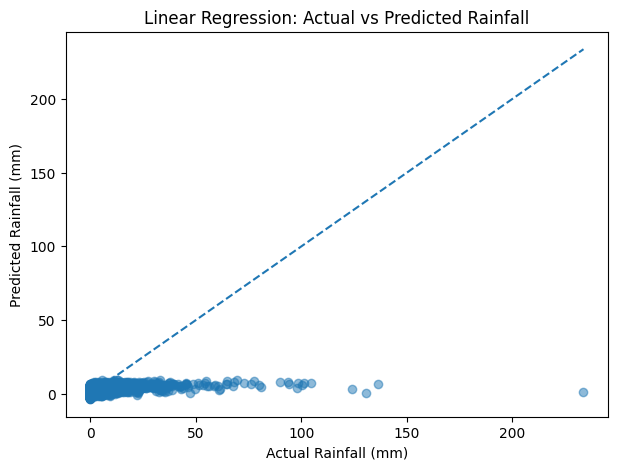

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.title("Linear Regression: Actual vs Predicted Rainfall")
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.show()


In [33]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 4.080660884768164
R² Score: 0.1379963927870691


<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Unsupervised Learning Models</b>
</h2>



<h2 style="text-align:center; 
           background:#a5eaf1; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b>K-Means Clustering</b>
</h2>

> Used for grouping data into clusters based on similarity.


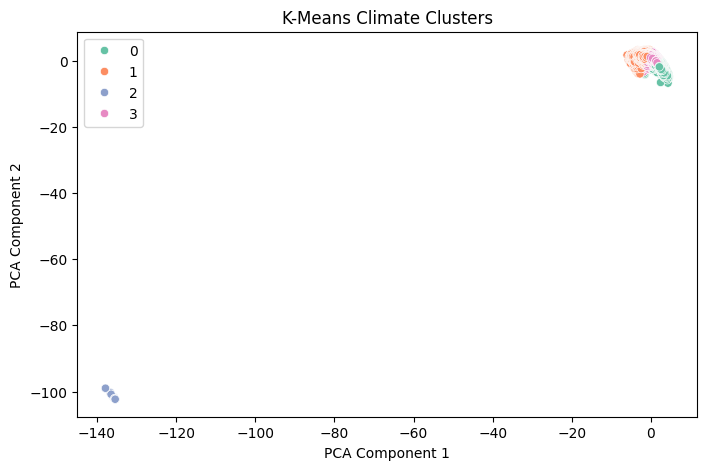

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features
X_unsup = df.select_dtypes(include="number")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette="Set2"
)
plt.title("K-Means Climate Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



Climate zone identification

Seasonal pattern discovery

<h2 style="text-align:center; 
           background:#d9ecf2; 
           color:#045174; 
           font-size:40px; 
           padding:10px;
           border-radius:12px;
           display: inline-block">
     <b> Conclusion</b>
</h2>



This analysis applies `unsupervised learning for climate pattern` discovery and `supervised learning for rainfall prediction`, supported by ***graphical diagnostics*** and model evaluation metrics, ensuring interpretability and industrial reliability.